#KMEANS CLUSTERING

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

data = pd.read_csv("D:/DSA/Wine_clust.csv")

In [2]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df=data.copy()

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(178, 13)

In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[data.columns]=sc.fit_transform(data)

In [10]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


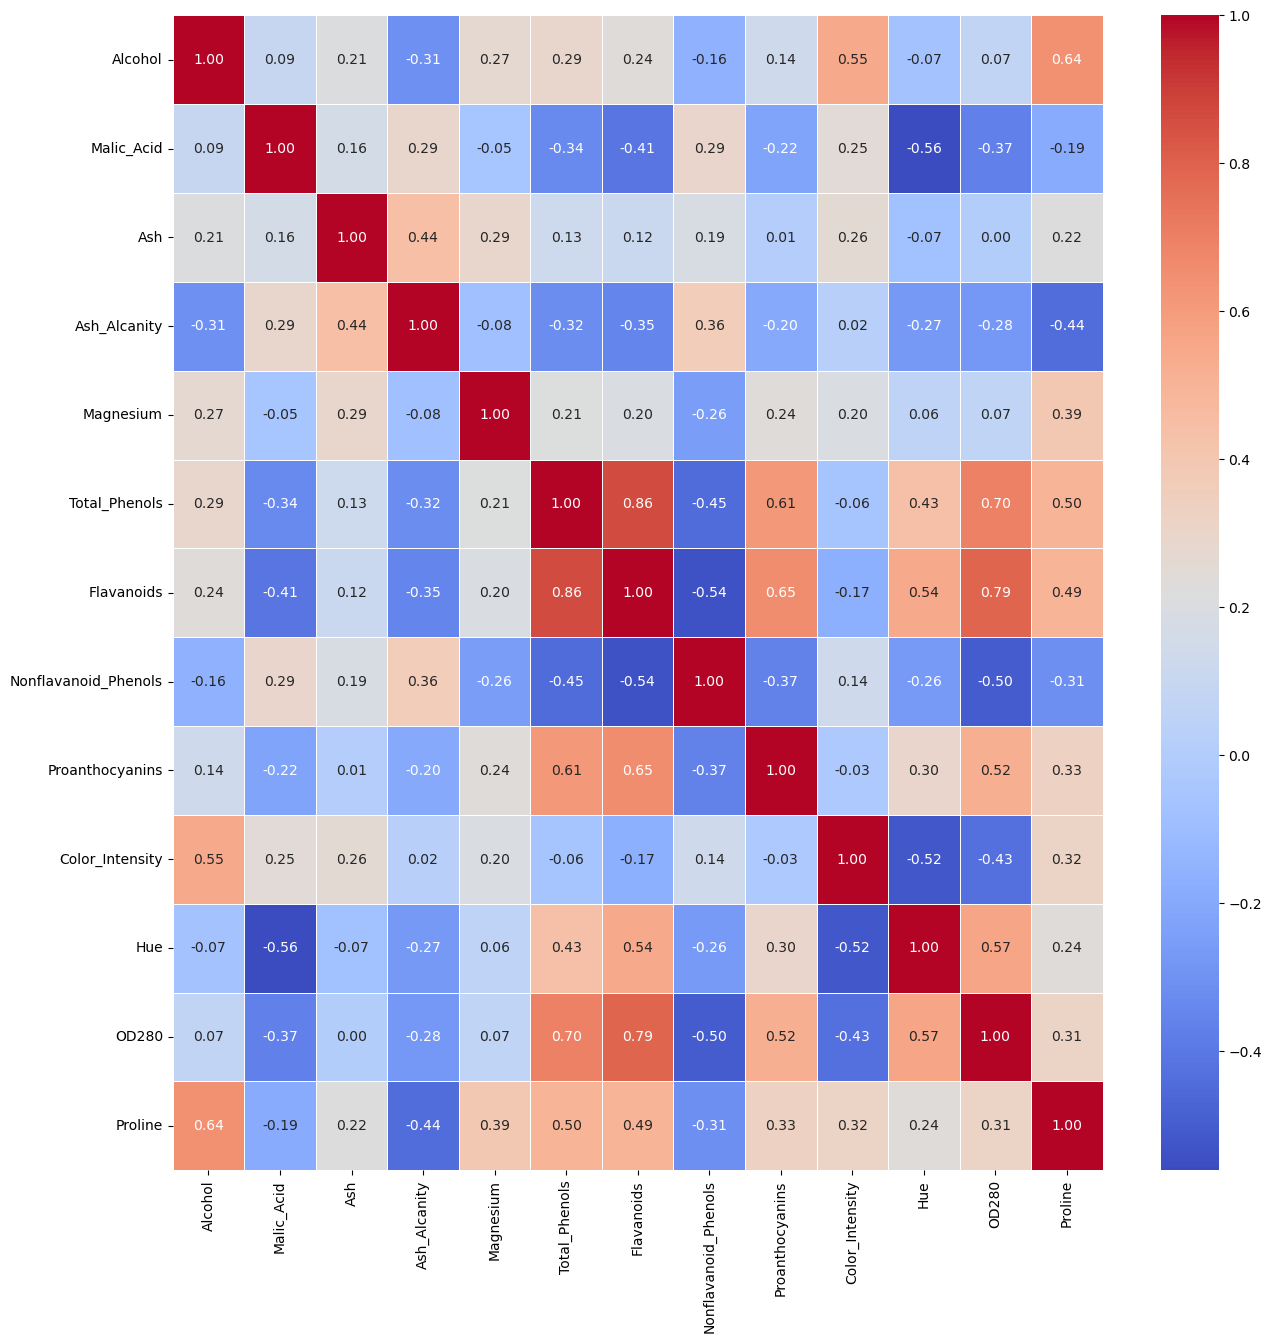

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


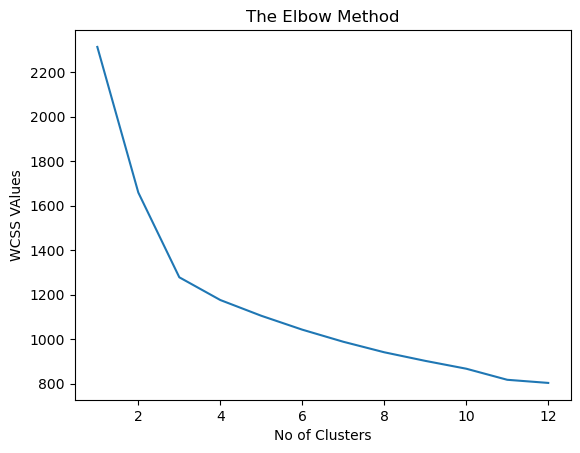

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS VAlues")
plt.show()


In [13]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(data)

In [14]:
pca = PCA(2, random_state=42)
wine_pca = pca.fit_transform(wine_scaled)

In [15]:
projection = pd.DataFrame(columns=['p','q'], data=wine_pca)
projection

,p,q
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(projection)

projection['cluster_pca'] = kmeans.predict(projection)

In [17]:
for n_clusters in range(2, 8):
    clusterer = KMeans(n_clusters=n_clusters,random_state=42)
    preds = clusterer.fit_predict(projection[['p','q']])
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(projection[['p','q']], preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.46491409089201524)
For n_clusters = 3, silhouette score is 0.5610505693103247)
For n_clusters = 4, silhouette score is 0.4914213395710318)
For n_clusters = 5, silhouette score is 0.4411644097008515)
For n_clusters = 6, silhouette score is 0.4309078483871919)
For n_clusters = 7, silhouette score is 0.42357060607218683)


In [18]:
projection1=projection.iloc[:].values

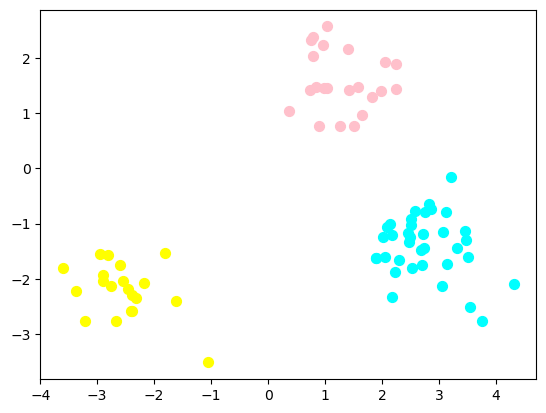

In [19]:
plt.scatter(projection1[preds == 0, 0], projection1[preds == 0, 1], s = 50, c = 'pink')
plt.scatter(projection1[preds == 1, 0], projection1[preds == 1, 1], s = 50, c = 'yellow')
plt.scatter(projection1[preds == 2, 0], projection1[preds == 2, 1], s = 50, c = 'cyan')
plt.show()

#DENSITY BASED CLUSTERING

In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)


from sklearn.cluster import DBSCAN
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=10)
    dbscan.fit(scaled_df)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

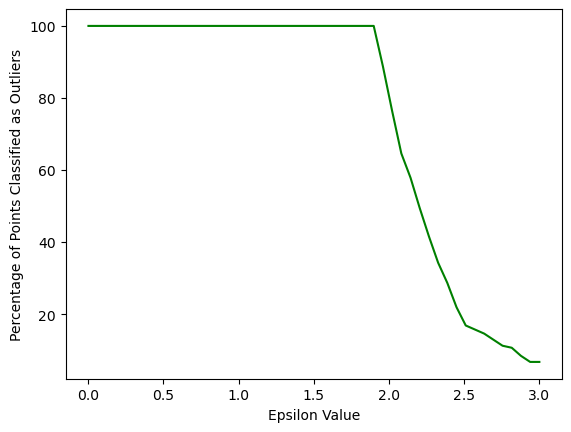

In [21]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

In [22]:
dbscan = DBSCAN(eps=2.5,min_samples=10)
model = dbscan.fit(scaled_df)

In [23]:
label = dbscan.labels_

In [24]:
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 2


In [25]:
y_means = dbscan.fit_predict(scaled_df)

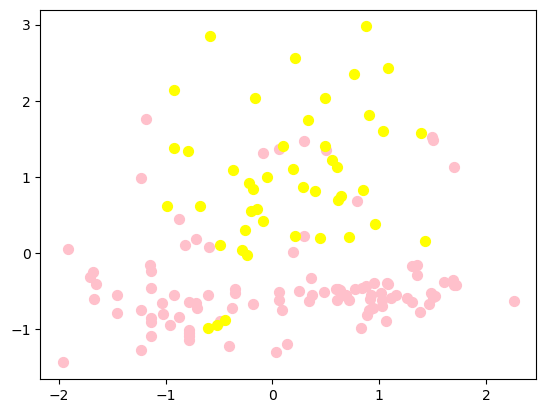

In [26]:
plt.scatter(scaled_df[y_means == 0, 0], scaled_df[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(scaled_df[y_means == 1, 0], scaled_df[y_means == 1, 1], s = 50, c = 'yellow')
plt.show()

In [27]:
sc = metrics.silhouette_score(scaled_df, label)
print("Silhouette Coefficient:%0.2f"%sc)

Silhouette Coefficient:0.20


#AGGLOMERATIVE HIERARCHIAL CLUSTERING

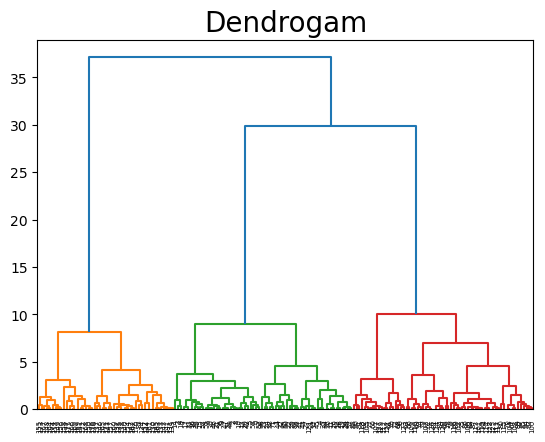

In [28]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(projection, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_ahc = ahc.fit_predict(projection)
y_ahc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [30]:
from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(projection, y_ahc)
sil_ahc

0.600142750731804

In [31]:
data1=projection.iloc[:].values

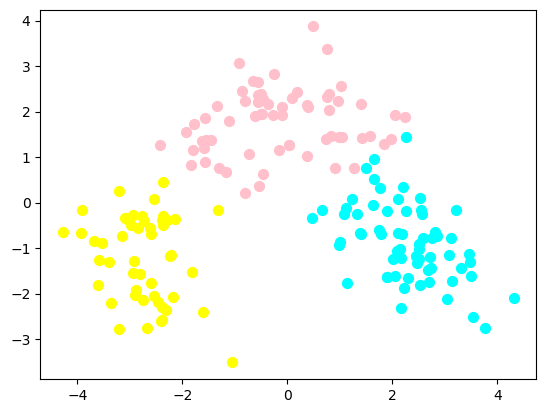

In [32]:
plt.scatter(data1[y_ahc == 0, 0], data1[y_ahc == 0, 1], s = 50, c = 'pink')
plt.scatter(data1[y_ahc == 1, 0], data1[y_ahc == 1, 1], s = 50, c = 'yellow')
plt.scatter(data1[y_ahc == 2, 0], data1[y_ahc == 2, 1], s = 50, c = 'cyan')
plt.show()

#IN KMEANS CLUSTERING AS PER THE ELBOW METHOD THE OPTIMUM NUMBER OD CLUSTER IS 3 (WITH PCA = 2)
#IN AGGLOMERATIVE HC AS PER THE DENDOGRAM , THE OPTIMUM NUMBER OF CLUSTERS IS 3

#IN DBSCAN WITH A EPSILON VALUE OF 2.5 THE OPTIMUM NUMBER OF CLUSTER IS 2